# Project: Investigate No-Show Appointments Dataset

# Introduction
We are going to investigate No-Show Appointments Dataset that contains 110.527 medical
appointments with its 14 associated variables. 

Variables are
#### 1 - PatientId: Identification of a patient
#### 2 - AppointmentID: Identification of each appointment
#### 3 - Gender: Male or Female 
#### 4 - ScheduledDay:The day someone called or registered the appointment.
#### 5 - AppointmentDay:The day of the actual appointment, when they have to visit the doctor.
#### 6 - Age: How old the patient is.
#### 7 - Neighbourhood: Where the appointment takes place.
#### 8 - Scholarship: True of False . 
Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
#### 9 - Hipertension: True or False
#### 10 - Diabetes: True or False
#### 11- Alcoholism: True or False
#### 12 - Handcap:  The number of disabilites a person has. According to dataset creator https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699
#### 13- SMS_received: True or False.
#### 14- No-show: True or False.

## From the Dataset we can try to figure out the answer to some questions such as:
#### 1- What gender has greater appointments?
#### 2- Which Neighbourhood has greater appointments?
#### 3- What is the average age of people having Diabetes?
#### 4- What is the average age of people having Hipertension?
#### 5- Which Neighbourhood has greater percent of people having Diabetes,Hipertension or  Alcoholism?
#### 6- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
#### 7- What are the insights that we can conclude from data of people with chronic diseases like Hipertension and  Diabetes?

### I have chosen two questions for analysis which are
#### 1- What are the insights that we can conclude from data of people with chronic diseases like Hipertension and  Diabetes?
#### 2- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Data Wrangling

## 1.1 Data Loading

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

## 1.2 Data Assessing



### &nbsp;&nbsp;&nbsp;&nbsp;   1.2.1 Visual Assessing

In [3]:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
79048,4.826832e+13,5707667,M,2016-05-17T09:56:12Z,2016-05-17T00:00:00Z,4,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
30891,2.727744e+14,5684148,F,2016-05-11T08:17:22Z,2016-05-24T00:00:00Z,46,PARQUE MOSCOSO,0,0,0,0,0,1,Yes
14143,8.415239e+12,5666621,F,2016-05-05T18:59:23Z,2016-05-05T00:00:00Z,39,BONFIM,0,0,0,0,0,0,No
36527,2.386688e+11,5720104,M,2016-05-19T13:19:04Z,2016-05-19T00:00:00Z,1,GURIGICA,0,0,0,0,0,0,No
2850,6.158625e+13,5468655,F,2016-03-15T08:34:41Z,2016-04-29T00:00:00Z,46,FRADINHOS,0,0,0,0,0,1,No
37436,7.558818e+11,5668652,M,2016-05-06T09:29:40Z,2016-05-06T00:00:00Z,4,FORTE SÃO JOÃO,0,0,0,0,0,0,No
96837,9.389457e+11,5761843,F,2016-06-02T07:07:57Z,2016-06-02T00:00:00Z,34,MARUÍPE,0,1,0,0,0,0,No
63166,1.512217e+14,5655327,F,2016-05-03T16:43:02Z,2016-05-03T00:00:00Z,24,JARDIM CAMBURI,0,0,0,0,0,0,No
108135,3.414894e+13,5766579,F,2016-06-02T15:22:21Z,2016-06-07T00:00:00Z,28,SANTOS REIS,0,0,0,0,0,1,No
101921,6.279814e+14,5777154,F,2016-06-06T13:09:26Z,2016-06-06T00:00:00Z,17,RESISTÊNCIA,0,0,0,0,0,0,No


### &nbsp;&nbsp;&nbsp;&nbsp;   1.2.2 Programmatic Assessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Get number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df["Age"].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

## &nbsp;&nbsp;&nbsp;&nbsp; 1.2.3 Assessment Summary
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1- No Missing values found.
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2- Wrong data in (Age) column as the min value is (-1).
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3- Inappropriate data types in  AppointmentDay and ScheduledDay columns 
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4- Wrong column name (Handcap).
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4- Some columns should be added to aid the analysis.


# 2 . Data cleaning

## &nbsp;&nbsp;&nbsp;&nbsp; 2.1 Drop values less than 0 in (Age) column


In [8]:
# Code
df = df[df["Age"]>= 0]

In [9]:
#check
df["Age"].value_counts().sort_index()

0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: Age, Length: 103, dtype: int64

## &nbsp;&nbsp;&nbsp;&nbsp; 2.2 Change AppointmentDay and ScheduledDay columns to datetime.

In [10]:
#CODE
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [11]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

## &nbsp;&nbsp;&nbsp;&nbsp; 2.3 Add 5 new columns to the dataframe that will help us in the analysis.


In [12]:
#CODE
df["Waiting_time"] =  df["AppointmentDay"]- df["ScheduledDay"]
df["appointment_day"] = df["AppointmentDay"].dt.day_name()
df["appointment_month"] = df["AppointmentDay"].dt.month_name()
df["Waiting_time_days"] = df["Waiting_time"].dt.days + df["Waiting_time"].dt.seconds/(3600*24)
df["appointment_daynum"] = df["AppointmentDay"].dt.day

In [13]:
#check
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_time,appointment_day,appointment_month,Waiting_time_days,appointment_daynum
15571,4.769683e+14,5524734,F,2016-03-30 08:08:52+00:00,2016-05-06 00:00:00+00:00,56,JESUS DE NAZARETH,0,0,0,0,0,1,No,36 days 15:51:08,Friday,May,36.660509,6
52228,8.132542e+14,5703050,F,2016-05-16 13:26:26+00:00,2016-05-18 00:00:00+00:00,55,JARDIM CAMBURI,0,0,0,0,0,0,No,1 days 10:33:34,Wednesday,May,1.439977,18
88747,7.316691e+13,5762769,M,2016-06-02 08:08:38+00:00,2016-06-02 00:00:00+00:00,48,ITARARÉ,0,0,0,0,0,0,No,-1 days +15:51:22,Thursday,June,-0.339329,2
35741,2.838332e+13,5712865,F,2016-05-18 09:24:44+00:00,2016-05-24 00:00:00+00:00,24,DA PENHA,0,0,0,0,0,0,No,5 days 14:35:16,Tuesday,May,5.607824,24
96572,4.677653e+11,5765734,F,2016-06-02 13:38:09+00:00,2016-06-02 00:00:00+00:00,30,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +10:21:51,Thursday,June,-0.568160,2


## &nbsp;&nbsp;&nbsp;&nbsp; 2.4 Another quality issue appeared
### Negative values in (Waiting_time) column where "ScheduledDay" is after "AppointmentDay"

In [14]:
#check
df["Waiting_time"].value_counts().sort_index()

-7 days +10:10:40    1
-2 days +09:09:19    1
-2 days +10:16:02    1
-2 days +13:08:07    1
-2 days +17:09:03    1
                    ..
178 days 13:16:26    1
178 days 13:16:43    1
178 days 13:16:59    1
178 days 13:17:18    1
178 days 13:19:01    1
Name: Waiting_time, Length: 89711, dtype: int64

In [15]:
#CODE
# slicing only right values
df = df[df["ScheduledDay"]< df["AppointmentDay"]]

In [16]:
#check
df["Waiting_time"].value_counts().sort_index()

0 days 03:16:20      1
0 days 03:19:13      1
0 days 03:36:54      1
0 days 03:37:24      1
0 days 03:39:51      1
                    ..
178 days 13:16:26    1
178 days 13:16:43    1
178 days 13:16:59    1
178 days 13:17:18    1
178 days 13:19:01    1
Name: Waiting_time, Length: 67588, dtype: int64

In [17]:
df["Waiting_time_days"].value_counts().sort_index()

0.136343      1
0.138345      1
0.150625      1
0.150972      1
0.152674      1
             ..
178.553079    1
178.553275    1
178.553461    1
178.553681    1
178.554873    1
Name: Waiting_time_days, Length: 67588, dtype: int64

## &nbsp;&nbsp;&nbsp;&nbsp; 2.5 Rename wrong column’s name.

In [18]:
#CODE
df.rename(columns = {"Handcap":"Handicap"},inplace = True)

In [19]:
#check
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_time,appointment_day,appointment_month,Waiting_time_days,appointment_daynum
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09,Friday,April,1.641076,29


## &nbsp;&nbsp;&nbsp;&nbsp; 2.6 Reset index

In [20]:
#code
df = df.reset_index(drop = True)

In [21]:
#check
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_time,appointment_day,appointment_month,Waiting_time_days,appointment_daynum
0,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09,Friday,April,1.641076,29
1,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48,Friday,April,1.371389,29
2,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02,Friday,April,1.347245,29
3,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,1 days 11:11:35,Friday,April,1.466377,29
4,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,1 days 09:01:49,Friday,April,1.376262,29


### &nbsp;&nbsp;&nbsp;&nbsp; 2.7 Create show and noshow dataframes

In [22]:
show_df = df[df["No-show"] == "No"]
noshow_df = df[df["No-show"] == "Yes"]

# 3. Analyzing Data and Visualization

## Research Question 1 
###  What are the insights that we can conclude from data of people with chronic diseases like Hipertension and  Diabetes?

In [23]:
#create a dataframe that only contains people with chronic diseases[Diabetes or Hipertension or Both]
chronic_df = df[(df["Diabetes"]==1)|(df["Hipertension"]==1)]
chronic_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_time,appointment_day,appointment_month,Waiting_time_days,appointment_daynum
0,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09,Friday,April,1.641076,29
17,5.819370e+12,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No,2 days 08:55:43,Friday,April,2.372025,29
22,5.873316e+12,5609446,M,2016-04-20 15:54:18+00:00,2016-04-29 00:00:00+00:00,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No,8 days 08:05:42,Friday,April,8.337292,29
24,8.224325e+14,5633339,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,No,0 days 14:39:24,Friday,April,0.610694,29
26,2.741649e+11,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,0 days 10:32:33,Friday,April,0.439271,29


# 1.1 Which chronic disease is more common?

In [24]:
Hipertension_details = df.groupby(["Hipertension"]).describe()
Hipertension_details["Age"]

,count,mean,std,min,25%,50%,75%,max
Hipertension,,,,,,,,
0,56927.0,32.603492,21.163359,0.0,15.0,31.0,49.0,115.0
1,15032.0,60.842669,13.744876,4.0,52.0,61.0,70.0,115.0


In [25]:
Diabetes_details = df.groupby(["Diabetes"]).describe()
Diabetes_details["Age"]

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,66582.0,36.649230,22.525341,0.0,18.0,36.0,54.0,115.0
1,5377.0,61.451925,13.474650,1.0,53.0,62.0,70.0,98.0


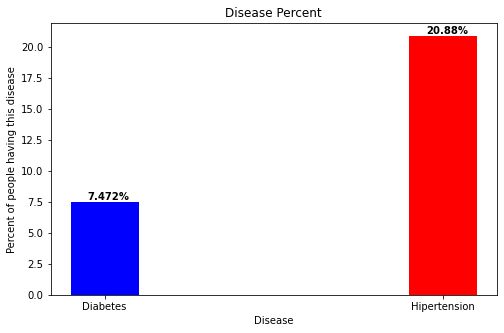

In [26]:
percentage = [len(df[df["Diabetes"] ==1])*100/len(df),len(df[df["Hipertension"] ==1])*100/len(df)]
x = np.arange(2)
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(x,percentage,width = 0.2,color = ["b","r"])
plt.xticks(x, ["Diabetes",'Hipertension'])
plt.text(x[0]-.05,percentage[0]+.2,str(percentage[0])[:5]+"%",fontweight ='bold')
plt.text(x[1]-.05,percentage[1]+.2,str(percentage[1])[:5]+"%",fontweight ='bold')
plt.title("Disease Percent")
plt.xlabel("Disease")
plt.ylabel("Percent of people having this disease");

# So:
## Hipertension is more Prevalent than Diabetes

# 1.2 What is the effect of Alcoholism on having chronic disease?

In [27]:
#Effect of Alcoholism on having Hipertension
Alcoholism_Hipertension = df.groupby(["Alcoholism","Hipertension"]).describe()
Alcoholism_Hipertension["Age"]

count       mean        std   min   25%   50%  \
Alcoholism Hipertension                                                    
0          0             55880.0  32.370025  21.216680   0.0  15.0  31.0   
           1             14257.0  61.078347  13.876518   4.0  52.0  61.0   
1          0              1047.0  45.063992  13.010538   4.0  36.0  46.0   
           1               775.0  56.507097  10.116742  26.0  50.0  57.0   

                          75%    max  
Alcoholism Hipertension               
0          0             49.0  115.0  
           1             70.0  115.0  
1          0             54.0   81.0  
           1             63.0   85.0

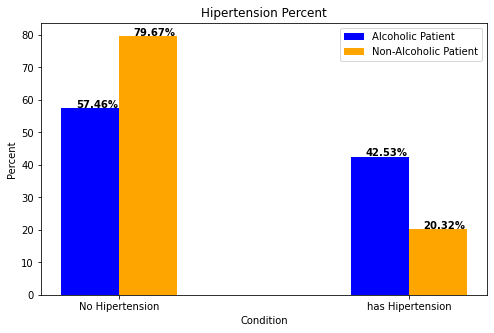

In [28]:
NoAlcoholism_percentage = [Alcoholism_Hipertension["Age"]["count"][0][0]*100/
                           sum(Alcoholism_Hipertension["Age"]["count"][0]),
                         Alcoholism_Hipertension["Age"]["count"][0][1]*100/
                           sum(Alcoholism_Hipertension["Age"]["count"][0])]

Alcoholism_percentage = [Alcoholism_Hipertension["Age"]["count"][1][0]*100/
                         sum(Alcoholism_Hipertension["Age"]["count"][1]),
                         Alcoholism_Hipertension["Age"]["count"][1][1]*100/
                         sum(Alcoholism_Hipertension["Age"]["count"][1])]


x = np.arange(2)
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(x-.1,Alcoholism_percentage,width = 0.2,color = ["b"])
plt.bar(x+.1,NoAlcoholism_percentage,width = 0.2,color = ["orange"])

plt.xticks(x, ["No Hipertension",'has Hipertension'])
plt.text(x[0]-.15,Alcoholism_percentage[0]+.1,str(Alcoholism_percentage[0])[:5]+"%",fontweight ='bold')
plt.text(x[1]-.15,Alcoholism_percentage[1]+.1,str(Alcoholism_percentage[1])[:5]+"%",fontweight ='bold')
plt.text(x[0]+.05,NoAlcoholism_percentage[0]+.1,str(NoAlcoholism_percentage[0])[:5]+"%",fontweight ='bold')
plt.text(x[1]+.05,NoAlcoholism_percentage[1]+.1,str(NoAlcoholism_percentage[1])[:5]+"%",fontweight ='bold')
plt.title("Hipertension Percent")
plt.ylabel("Percent");
plt.xlabel("Condition")
plt.legend(["Alcoholic Patient","Non-Alcoholic Patient"]);

# Note:
### About 42.5% of Alcoholic Patients suffer Hipertension compared to only 20.3% for  Non-Alcoholic Patients

In [29]:
#Effect of Alcoholism on having Diabetes
Alcoholism_Diabetes = df.groupby(["Alcoholism","Diabetes"]).describe()
Alcoholism_Diabetes["Age"]

count       mean        std   min   25%   50%   75%  \
Alcoholism Diabetes                                                          
0          0         64968.0  36.347279  22.626989   0.0  18.0  36.0  54.0   
           1          5169.0  61.563358  13.588287   1.0  53.0  62.0  70.0   
1          0          1614.0  48.803594  13.090338   4.0  40.0  50.0  57.0   
           1           208.0  58.682692   9.881681  28.0  54.0  58.0  66.0   

                       max  
Alcoholism Diabetes         
0          0         115.0  
           1          98.0  
1          0          85.0  
           1          84.0

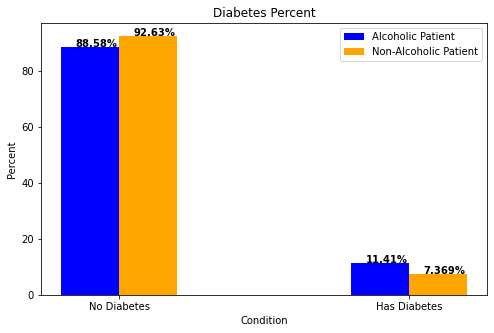

In [30]:
Alcoholism_percentage = [Alcoholism_Diabetes["Age"]["count"][1][0]*100/
                         sum(Alcoholism_Diabetes["Age"]["count"][1]),
                         Alcoholism_Diabetes["Age"]["count"][1][1]*100/
                         sum(Alcoholism_Diabetes["Age"]["count"][1])]

NoAlcoholism_percentage = [Alcoholism_Diabetes["Age"]["count"][0][0]*100/
                           sum(Alcoholism_Diabetes["Age"]["count"][0]),
                         Alcoholism_Diabetes["Age"]["count"][0][1]*100/
                           sum(Alcoholism_Diabetes["Age"]["count"][0])]
x = np.arange(2)
fig, ax = plt.subplots(figsize = (8,5))
plt.bar(x-.1,Alcoholism_percentage,width = 0.2,color = ["b"])
plt.bar(x+.1,NoAlcoholism_percentage,width = 0.2,color = ["orange"])

plt.xticks(x, ["No Diabetes",'Has Diabetes'])
plt.text(x[0]-.15,Alcoholism_percentage[0]+.1,str(Alcoholism_percentage[0])[:5]+"%",fontweight ='bold')
plt.text(x[1]-.15,Alcoholism_percentage[1]+.1,str(Alcoholism_percentage[1])[:5]+"%",fontweight ='bold')
plt.text(x[0]+.05,NoAlcoholism_percentage[0]+.1,str(NoAlcoholism_percentage[0])[:5]+"%",fontweight ='bold')
plt.text(x[1]+.05,NoAlcoholism_percentage[1]+.1,str(NoAlcoholism_percentage[1])[:5]+"%",fontweight ='bold')
plt.title("Diabetes Percent")
plt.ylabel("Percent")
plt.xlabel("Condition")
plt.legend(["Alcoholic Patient","Non-Alcoholic Patient"]);

# Note:
### About 11.4% of Alcoholic Patients suffer Diabetes compared to only 7.3% for  Non-Alcoholic Patients

# 1.3 What is the effect of age on having chronic disease?

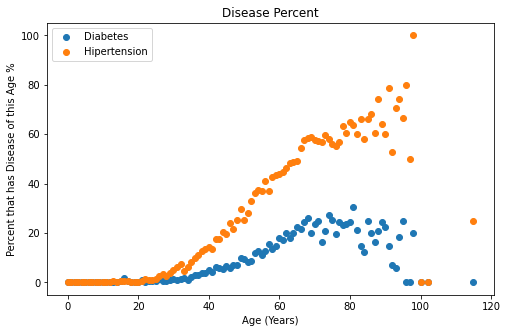

In [31]:
#Plot Age VS The Percent of of people in this age who suffer Diabetes and Hipertension  
Diabetes_percent = (chronic_df[chronic_df["Diabetes"]==1]["Age"].value_counts()/
                    df["Age"].value_counts()).fillna(0)*100
Hipertension_percent= (chronic_df[chronic_df["Hipertension"]==1]["Age"].value_counts()/
                       df["Age"].value_counts()).fillna(0)*100

#fill nan values with zero as nan values means that Noone of this age has diabetes.
fig, ax = plt.subplots(figsize = (8,5))
plt.scatter(Diabetes_percent.index,Diabetes_percent.values)
plt.scatter(Hipertension_percent.index,Hipertension_percent.values)
plt.title("Disease Percent")
plt.xlabel("Age (Years)")
plt.ylabel("Percent that has Disease of this Age %")
plt.legend(["Diabetes","Hipertension"]);

# Notes
#### 1- As noticed before, the percent of people with Hipertension is more than those with Diabetes.
#### 2- About Mid 20th is the beginning to get a chronic disease.
#### 3- Getting older increase the risk of  getting a chronic disease.
#### 4- For people with about 65 years old and older, the risk of getting diabetes becomes some kind constant or less than younger patients.

#### 5- Pervious note makes no sense, so those older patients should be examined and surveys about their food and daily routine should be conducted.

# Research Question 2 
## What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### 2.1 What is the effect of Age on probability of showing up?

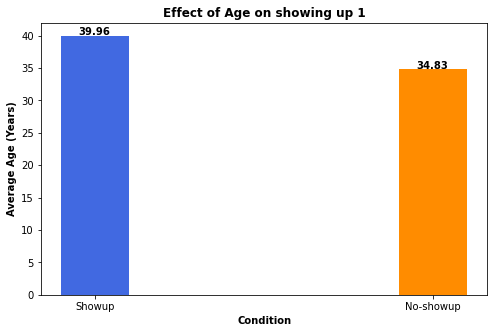

In [32]:
#Get the average age of people who showed up and those who didn't.
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Effect of Age on showing up 1",fontweight ='bold')
plt.xlabel("Condition",fontweight ='bold')
plt.ylabel("Average Age (Years)",fontweight ='bold')
x = np.arange(2)
average = df.groupby("No-show").mean()["Age"].values
ax.bar(x,average,color=["royalblue","darkorange"] ,width = .2)
plt.xticks(x, ["Showup",'No-showup'])
ax.text(x[0]-.05,average[0]+.1,str(average[0])[:5],fontweight ='bold')
ax.text(x[1]-.05,average[1]+.1,str(average[1])[:5],fontweight ='bold');

## Note:
### Average age for people who showed-up is higher than for those who didn't.

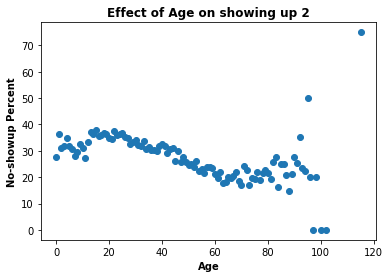

In [33]:
#percent of each age that didn't show up
Age_percent = (noshow_df["Age"].value_counts().sort_index()/df["Age"].value_counts().sort_index()).fillna(0)*100
plt.title("Effect of Age on showing up 2",fontweight ='bold')
plt.xlabel("Age",fontweight ='bold')
plt.ylabel("No-showup Percent",fontweight ='bold')
plt.scatter(Age_percent.index,Age_percent.values);

## Note:
### In general, The higher the age is, the lower percentage of people who didn't show-up.

## 2.2 What is the effect of Waiting time on probability of showing up?

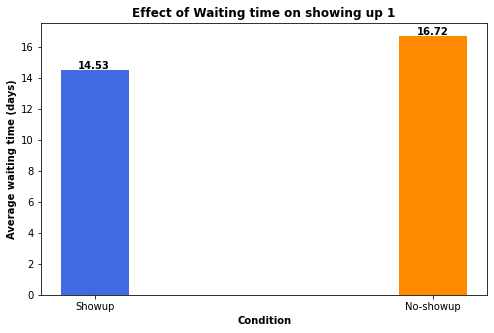

In [34]:
#Get the average Waiting time between registering and the appointment of people who showed up and those who didn't.
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Effect of Waiting time on showing up 1",fontweight ='bold')
plt.xlabel("Condition",fontweight ='bold')
plt.ylabel("Average waiting time (days)",fontweight ='bold')
x = np.arange(2)
average = df.groupby("No-show").mean()["Waiting_time_days"].values
ax.bar(x,average,color=["royalblue","darkorange"] ,width = .2)
plt.xticks(x, ["Showup",'No-showup'])
ax.text(x[0]-.05,average[0]+.1,str(average[0])[:5],fontweight ='bold')
ax.text(x[1]-.05,average[1]+.1,str(average[1])[:5],fontweight ='bold');

In [35]:
#group Waiting time data by value ranges 
#to plot each Waiting time range VS the percentage of people who did't show up in this range. 
bins = np.arange(0,150,5)
noshow_counts= pd.cut(noshow_df["Waiting_time_days"],bins).value_counts()
total_counts = pd.cut(df["Waiting_time_days"],bins).value_counts()
percentage = (noshow_counts/total_counts)*100
percentage

(0, 5]         23.500559
(5, 10]        27.047859
(10, 15]       31.902439
(15, 20]       32.377495
(20, 25]       34.134897
(25, 30]       31.069998
(30, 35]       34.578933
(35, 40]       34.285714
(40, 45]       34.276970
(45, 50]       31.543624
(50, 55]       35.947712
(55, 60]       32.752613
(60, 65]       25.857143
(65, 70]       31.054688
(70, 75]       29.880478
(75, 80]       35.416667
(80, 85]       22.727273
(85, 90]       28.318584
(90, 95]       19.117647
(95, 100]      18.181818
(100, 105]     45.454545
(105, 110]      7.142857
(110, 115]      8.333333
(115, 120]      0.000000
(120, 125]      0.000000
(125, 130]     50.000000
(130, 135]     41.666667
(135, 140]    100.000000
(140, 145]     37.500000
Name: Waiting_time_days, dtype: float64

In [36]:
#get the weight(number of observations) of each range in the dataset
weight = (total_counts/len(df))*100
weight

(0, 5]        32.298948
(5, 10]       19.832127
(10, 15]      11.395378
(15, 20]       7.657138
(25, 30]       7.286093
(20, 25]       7.108214
(30, 35]       5.132089
(35, 40]       2.091469
(40, 45]       1.816312
(45, 50]       1.035312
(60, 65]       0.972776
(55, 60]       0.797676
(65, 70]       0.711516
(50, 55]       0.637863
(70, 75]       0.348810
(75, 80]       0.266819
(85, 90]       0.157034
(80, 85]       0.152865
(90, 95]       0.094498
(100, 105]     0.030573
(105, 110]     0.019456
(110, 115]     0.016676
(130, 135]     0.016676
(95, 100]      0.015286
(140, 145]     0.011117
(115, 120]     0.006948
(120, 125]     0.006948
(125, 130]     0.002779
(135, 140]     0.001390
Name: Waiting_time_days, dtype: float64

# So we can only take waiting time ranges from 0 to 50 to get accurate explanation as other ranges percentages in dataset are very small.

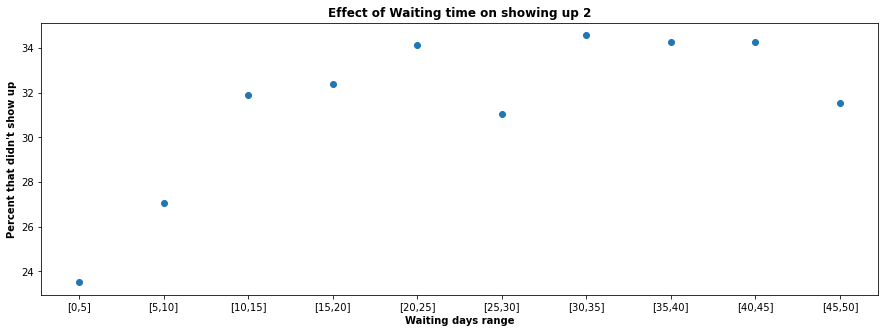

In [37]:
locations = []
c = 0
for i in range(len((noshow_counts/total_counts).index)):
    locations.append("[{},{}]".format(c,c+5))
    c+=5
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(locations[:10],((noshow_counts/total_counts)*100).values[:10])
plt.title("Effect of Waiting time on showing up 2",fontweight ='bold')
plt.xlabel("Waiting days range",fontweight ='bold')
plt.ylabel("Percent that didn't show up",fontweight ='bold');

## Note:
### 1- The longer the waiting time is, the higher percentage that didn't show up.
### 2- Average waiting time for patients who didn't show up is 16.72 days compared to 14.5 for those who showed up


## 2.3 What is the effect of Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received on probabilty of showing up?

In [38]:
df.groupby(["Scholarship","No-show"]).count()["Age"]

Scholarship  No-show
0            No         47099
             Yes        18189
1            No          4338
             Yes         2333
Name: Age, dtype: int64

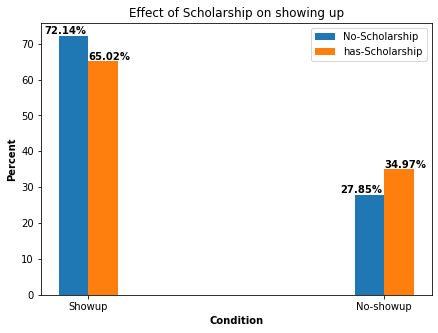

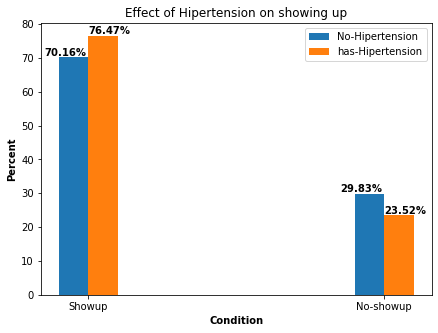

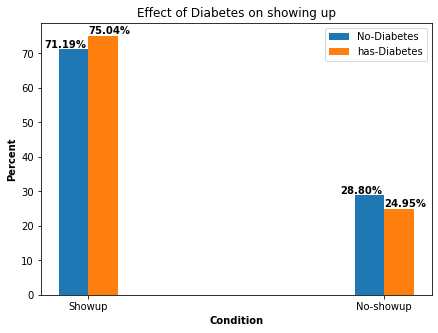

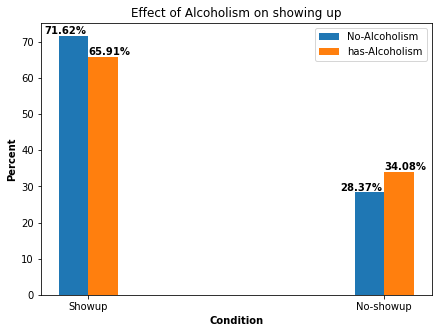

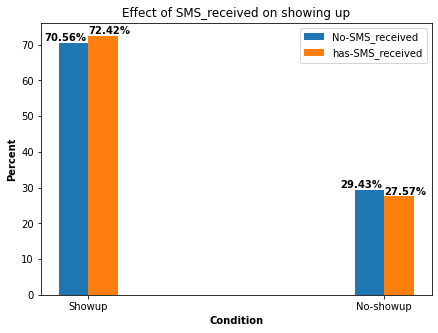

In [39]:
# Get effect of ('Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received') the [0,1] columns,
# by comparing the percentage of people didn't show up of patients having Scholarship ("for example") 
# and percent among those who don't have it.   
variables = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for variable in variables:
    fig, ax = plt.subplots(figsize = (7,5))
    plt.title("Effect of {} on showing up".format(variable))
    no = len(df[df[variable]==0])#total number of patients who don't have the [variable] Scholarship for example. 
    yes = len(df[df[variable]==1])#total number of patients who have the [variable] Scholarship for example.
    Total = [no,no,yes,yes]
    #Get the percent of patients without Scholarship(for example) who showed up an not show up
    #And get the percent of patients with Scholarship (for example) who showed up an not show up
    variable_Percent = (df.groupby([variable,"No-show"]).count()["Age"]/Total)*100
    x = np.arange(2)
    #plot for percent of patients without Scholarship(for example) who showed up and didn't show up. 
    ax.bar(x-0.05,variable_Percent[0],width = 0.1)
    ax.text(x[0]-.15 ,variable_Percent[0][0]+.5,str(variable_Percent[0][0])[:5]+"%", fontweight ='bold' )
    ax.text(x[1]-.15,variable_Percent[0][1]+.5,str(variable_Percent[0][1])[:5]+"%", fontweight ='bold' )
    #plot for percent of patients with Scholarship(for example) who showed up and didn't show up. 
    ax.bar(x+0.05,variable_Percent[1],width = 0.1)
    ax.text(x[0] ,variable_Percent[1][0]+.5,str(variable_Percent[1][0])[:5]+"%", fontweight ='bold' )
    ax.text(x[1],variable_Percent[1][1]+.5,str(variable_Percent[1][1])[:5]+"%", fontweight ='bold' )
    plt.xticks(x, ["Showup",'No-showup'])
    plt.legend(["No-{}".format(variable),"has-{}".format(variable)]);
    plt.xlabel("Condition",fontweight ='bold')
    plt.ylabel("Percent",fontweight ='bold')

## Note:
#### 1- Higher percent of people with Scholarship didn’t show up
#### 2- Higher percent of people without Hypertension didn’t show up
#### 3 - Higher percent of people without Diabetes didn’t show up
#### 4- Higher percent of people with Alcoholism didn’t show up
#### 5- Slightly higher percent of people that didn’t receive SMS didn’t show up

## 2.4 What is the effect of Gender on probabilty of showing up?

In [40]:
Gender_count = df.groupby(["Gender","No-show"]).count()["Age"]
Gender_count

Gender  No-show
F       No         34396
        Yes        13674
M       No         17041
        Yes         6848
Name: Age, dtype: int64

In [41]:
female_num = df[(df["Gender"]== "F")]["Gender"].count()
male_num = df[(df["Gender"]== "M")]["Gender"].count()
total_num = [female_num,female_num,male_num,male_num]
total_num

[48070, 48070, 23889, 23889]

In [42]:
normalized_Gender = (Gender_count/total_num)*100
normalized_Gender

Gender  No-show
F       No         71.553984
        Yes        28.446016
M       No         71.334087
        Yes        28.665913
Name: Age, dtype: float64

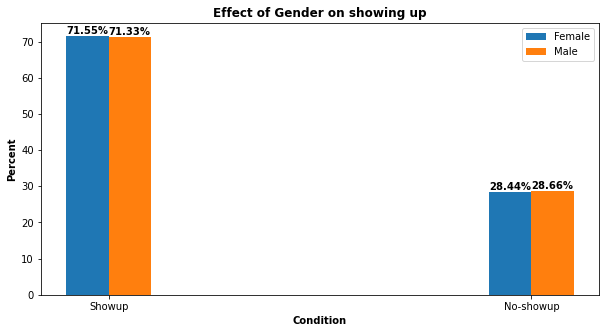

In [43]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title("Effect of Gender on showing up",fontweight ='bold')
x = np.arange(2)
ax.bar(x-0.05,normalized_Gender[0:2],width = 0.1)
ax.text(x[0]-.1 ,normalized_Gender[0]+.5,str(normalized_Gender[0])[:5]+"%", fontweight ='bold' )
ax.text(x[1]-.1 ,normalized_Gender[1]+.5,str(normalized_Gender[1])[:5]+"%", fontweight ='bold' )
ax.bar(x+0.05,normalized_Gender[2:],width = 0.1)
ax.text(x[0] ,normalized_Gender[2]+.5,str(normalized_Gender[2])[:5]+"%", fontweight ='bold' )
ax.text(x[1] ,normalized_Gender[3]+.5,str(normalized_Gender[3])[:5]+"%", fontweight ='bold' )
plt.legend(["Female",'Male'])
plt.xticks(x, ["Showup","No-showup"])
plt.xlabel("Condition",fontweight ='bold')
plt.ylabel("Percent",fontweight ='bold');

## Note:
#### About 71.5% of registered Females attended.
#### About 71.3% of registered Males attended.
#### So, it seems Gender doesn't have a significant effect on Attendance

### 2.5 What is the effect of AppointmentDay on probabilty of showing up? 

In [44]:
df.groupby("appointment_day").count()["Age"]

appointment_day
Friday       12516
Monday       14581
Saturday        31
Thursday     11325
Tuesday      16462
Wednesday    17044
Name: Age, dtype: int64

In [45]:
#total of no-show appointments in each week day
noshow_df.groupby("appointment_day").count()["Age"]

appointment_day
Friday       3674
Monday       4405
Saturday        9
Thursday     3088
Tuesday      4719
Wednesday    4627
Name: Age, dtype: int64

In [46]:
#Get percentage of patients that didn't showup in each day of the wee
absense_percentage = ((noshow_df.groupby("appointment_day").count()
                          /df.groupby("appointment_day").count())["Age"]*100).sort_values()
absense_percentage

appointment_day
Wednesday    27.147383
Thursday     27.267108
Tuesday      28.666019
Saturday     29.032258
Friday       29.354426
Monday       30.210548
Name: Age, dtype: float64

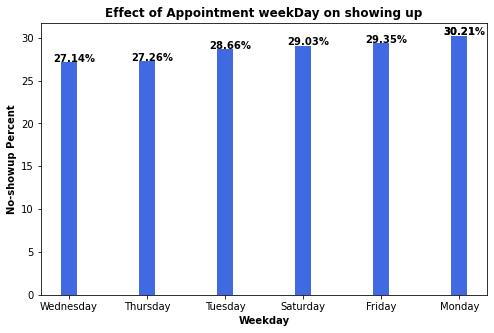

In [47]:
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Effect of Appointment weekDay on showing up",fontweight ='bold')
x = np.arange(6)
ax.bar(x,absense_percentage,color=["royalblue"] ,width = .2)
plt.xticks(x, absense_percentage.index)
ax.text(x[0]-.2,absense_percentage[0]+.1,str(absense_percentage[0])[:5]+"%",fontweight ='bold');
ax.text(x[1]-.2,absense_percentage[1]+.1,str(absense_percentage[1])[:5]+"%",fontweight ='bold');
ax.text(x[2]-.2,absense_percentage[2]+.1,str(absense_percentage[2])[:5]+"%",fontweight ='bold');
ax.text(x[3]-.2,absense_percentage[3]+.1,str(absense_percentage[3])[:5]+"%",fontweight ='bold');
ax.text(x[4]-.2,absense_percentage[4]+.1,str(absense_percentage[4])[:5]+"%",fontweight ='bold');
ax.text(x[5]-.2,absense_percentage[5]+.1,str(absense_percentage[5])[:5]+"%",fontweight ='bold');
ax.text(x[-1]-.2,absense_percentage[-1]+.1,str(absense_percentage[-1])[:5],fontweight ='bold');
plt.xlabel("Weekday",fontweight ='bold')
plt.ylabel("No-showup Percent",fontweight ='bold');

## Note:  
### Days in the beginning and end of the week [Monday - Saturday - Friday ] are more probable to have more patient that no-show up than midweek days.

## 2.6 What is the effect of Neighborhood on probabilty of showing up? 

In [48]:
#Get percent of no-show up for each Neighborhood
neighbourhood_noshow_percent= (noshow_df["Neighbourhood"].value_counts().sort_index()/
                               df["Neighbourhood"].value_counts().sort_index()).sort_values()*100
neighbourhood_noshow_percent

ILHA DO BOI                      8.695652
SOLON BORGES                    19.287834
AEROPORTO                       20.000000
DE LOURDES                      20.270270
MORADA DE CAMBURI               20.512821
                                  ...    
HORTO                           35.964912
ITARARÉ                         36.497270
JESUS DE NAZARETH               37.492877
GURIGICA                        38.371041
ILHAS OCEÂNICAS DE TRINDADE    100.000000
Name: Neighbourhood, Length: 80, dtype: float64

In [49]:
#Get the percent of patients in each Neighborhood relative to all patients
Neighbourhood_weight = (df["Neighbourhood"].value_counts()/len(df))*100
Neighbourhood_weight[:50]

JARDIM CAMBURI         7.244403
MARIA ORTIZ            5.183507
RESISTÊNCIA            3.916119
JARDIM DA PENHA        3.689601
ITARARÉ                3.308829
CENTRO                 3.154574
TABUAZEIRO             2.673745
JESUS DE NAZARETH      2.438889
BONFIM                 2.373574
CARATOÍRA              2.349949
JABOUR                 2.337442
SANTA MARTHA           2.290193
SANTO ANTÔNIO          2.252672
SANTO ANDRÉ            2.242944
SÃO PEDRO              2.201253
ANDORINHAS             2.117873
ILHA DO PRÍNCIPE       2.088689
ROMÃO                  1.976125
SÃO JOSÉ               1.912200
DA PENHA               1.899693
MARUÍPE                1.888575
FORTE SÃO JOÃO         1.796857
ILHA DE SANTA MARIA    1.784349
SÃO CRISTÓVÃO          1.770453
NOVA PALESTINA         1.648161
BELA VISTA             1.546714
GURIGICA               1.535597
CRUZAMENTO             1.424422
PRAIA DO SUÁ           1.313248
REDENÇÃO               1.293792
SANTOS DUMONT          1.218750
SANTA TE

### we will deal only with Neighbourhoods that have at least 1% of all patients to make accurate explanation

In [50]:
Neighbourhood_weight[Neighbourhood_weight>1]

JARDIM CAMBURI         7.244403
MARIA ORTIZ            5.183507
RESISTÊNCIA            3.916119
JARDIM DA PENHA        3.689601
ITARARÉ                3.308829
CENTRO                 3.154574
TABUAZEIRO             2.673745
JESUS DE NAZARETH      2.438889
BONFIM                 2.373574
CARATOÍRA              2.349949
JABOUR                 2.337442
SANTA MARTHA           2.290193
SANTO ANTÔNIO          2.252672
SANTO ANDRÉ            2.242944
SÃO PEDRO              2.201253
ANDORINHAS             2.117873
ILHA DO PRÍNCIPE       2.088689
ROMÃO                  1.976125
SÃO JOSÉ               1.912200
DA PENHA               1.899693
MARUÍPE                1.888575
FORTE SÃO JOÃO         1.796857
ILHA DE SANTA MARIA    1.784349
SÃO CRISTÓVÃO          1.770453
NOVA PALESTINA         1.648161
BELA VISTA             1.546714
GURIGICA               1.535597
CRUZAMENTO             1.424422
PRAIA DO SUÁ           1.313248
REDENÇÃO               1.293792
SANTOS DUMONT          1.218750
SANTA TE

In [51]:
# slice neighbourhood_noshow_percent with only Neighbourhoods that have at least 1% of all patients
neighbourhood_noshow_percent = neighbourhood_noshow_percent.loc[(Neighbourhood_weight[Neighbourhood_weight>1]).index]

neighbourhood_noshow_percent.sort_values()

JARDIM DA PENHA        22.485876
FORTE SÃO JOÃO         23.511214
INHANGUETÁ             24.331210
SANTO ANTÔNIO          25.478100
JABOUR                 25.564804
JARDIM CAMBURI         26.069442
SANTA TEREZA           26.473988
ILHA DE SANTA MARIA    26.869159
SÃO JOSÉ               27.107558
SÃO CRISTÓVÃO          27.158556
TABUAZEIRO             27.338877
CRUZAMENTO             27.512195
REDENÇÃO               27.604726
CONSOLAÇÃO             27.722772
DA PENHA               28.017557
JOANA D´ARC            28.051643
SANTA MARTHA           28.094660
SÃO PEDRO              28.472222
CENTRO                 28.766520
NOVA PALESTINA         29.005059
BELA VISTA             29.020665
SANTO ANDRÉ            29.368030
MARUÍPE                29.654157
PRAIA DO SUÁ           29.735450
BONFIM                 30.035129
RESISTÊNCIA            30.411639
MARIA ORTIZ            30.509383
ROMÃO                  30.731364
SÃO BENEDITO           31.113801
CARATOÍRA              31.992904
ANDORINHAS

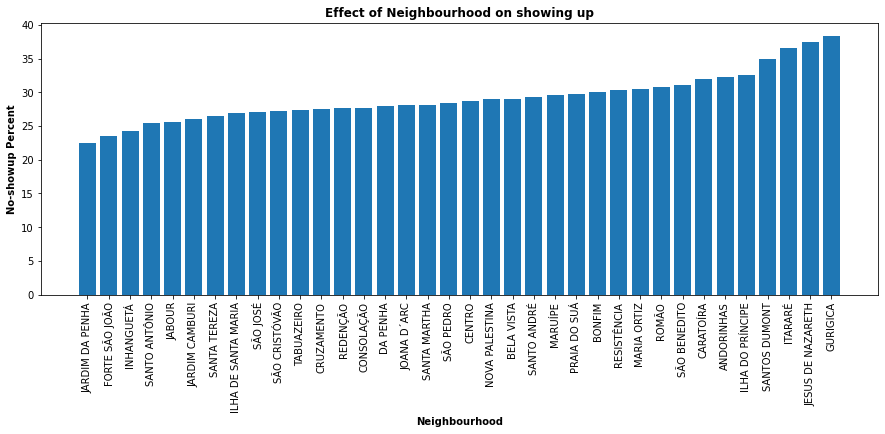

In [52]:
#plot Neighbourhood Vs. No-showup Percent
fig, ax = plt.subplots(figsize = (15,5))
plt.title("Effect of Neighbourhood on showing up",fontweight ='bold')
x = np.arange(len(neighbourhood_noshow_percent))
ax.bar(x,neighbourhood_noshow_percent.sort_values())
plt.xticks(x,neighbourhood_noshow_percent.sort_values().index,rotation ='vertical')
plt.xlabel("Neighbourhood",fontweight ='bold')
plt.ylabel("No-showup Percent",fontweight ='bold');

# Conclusions
<h1>Results</h1>
<ol>
    <li>Hipertension is more prevalent than Diabetes</li>
    <li>About 42.5% of Alcoholic Patients suffer Hipertension compared to only 20.3% for Non-Alcoholic Patients,So the probability to get Hipertension are twice for Alcoholic Patients compared to non- Alcoholic Patients</li>
    <li> About 11.4% of Alcoholic Patients suffer Diabetes compared to only 7.3% for Non-Alcoholic Patients, So the probability to get Diabetes are one and half for Alcoholic Patients compared to non- Alcoholic Patients.</li>
    <li>About Mid 20th is the begining to get a chronic disease.</li>
    <li>Getting older increase the risk of  getting a chronic disease.</li>
    <li> The percent of diabetic patients with about 65 years old and older is decreasing.This makes no sense, so those older patients should be examined and surveys about there food and daily routine should be conducted.</li>
    <li>In general, The higher the age is, the lower percentage of people who didn't show-up.</li>
    <li>The longer the waiting time is, the higher percentage that didn't show up.</li>
    <li>Higher percent of people with Scholarship didn’t show up.</li>
    <li>Higher percent of people without Hypertension didn’t show up.</li>
    <li>Higher percent of people without Diabetes didn’t show up.</li>
    <li>Higher percent of people with Alcoholism didn’t show up.</li>
    <li>Slightly higher percent of people that didn’t receive SMS didn’t show up.</li>
    <li>Days in the beginning and end of the week [Monday - Saturday - Friday ] are more probable to have more patient that no-show up.</li>
    <li> Places like GURIGICA, JESUS DE NAZARETH and ITARARÉ have high percent of no-show ups. Surveys should be carried out to collect some data about quality of doctors and the way they are treating patients and the way the people of these places are thinking.</li>
</ol>
 
<h2>Limitations</h2>
<ol>
    <li>Hipertension, Diabetes and Alcoholism data are categorical, so our explanation is restricted as we don't have information about the level of disease in each patient and disease history.  </li>
    <li>Higher percent of people with Scholarship didn’t show up and this seems counter logic. More information is needed to make more accurate explanation. </li>
    <li>Our explanation based on the percent of each Age that didn't show up or that has a chronic disease cann't be generalised, as we don't have equal amount of data for each age.</li>
    
</ol>